In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model

In [2]:
ald = pd.read_csv('data/multiple_linear_regression_dataset.csv')

In [3]:
ald.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


In [4]:
X = ald[['age', 'experience']]

In [5]:
y = ald['income']

In [6]:
regr = linear_model.LinearRegression()

In [7]:
regr.fit(X, y)

LinearRegression()

In [8]:
regr.coef_

array([ -99.19535546, 2162.40419192])

In [9]:
ypr = regr.predict(X)

In [10]:
ypr

array([30944.2101595 , 34773.04176604, 30924.31653128, 38899.45943897,
       48620.33148852, 41339.55606906, 39296.24086081, 36637.85989158,
       38403.48266166, 44692.30452651, 30547.42873765, 46061.14587475,
       36717.16161882, 34852.34349328, 52845.9445169 , 40169.10543174,
       62269.23050007, 31142.60087042, 46358.73194113, 49215.50362128])

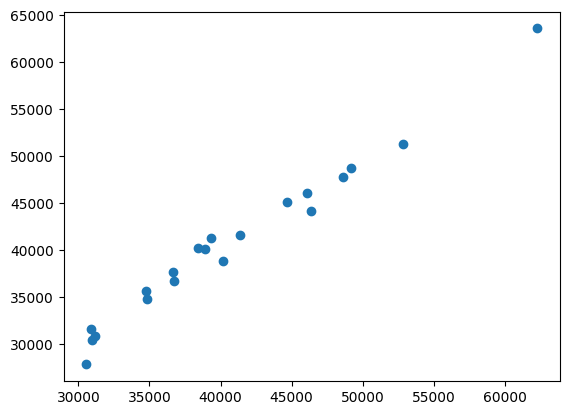

In [11]:
plt.scatter(ypr, ald['income'])

In [12]:
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell

def find_notebook(fullname, path=None):
    """find a notebook, given its fully qualified name and an optional path

    This turns "foo.bar" into "foo/bar.ipynb"
    and tries turning "Foo_Bar" into "Foo Bar" if Foo_Bar
    does not exist.
    """
    name = fullname.rsplit('.', 1)[-1]
    if not path:
        path = ['']
    for d in path:
        nb_path = os.path.join(d, name + ".ipynb")
        if os.path.isfile(nb_path):
            return nb_path
        # let import Notebook_Name find "Notebook Name.ipynb"
        nb_path = nb_path.replace("_", " ")
        if os.path.isfile(nb_path):
            return nb_path

class NotebookLoader(object):
    """Module Loader for Jupyter Notebooks"""

    def __init__(self, path=None):
        self.shell = InteractiveShell.instance()
        self.path = path

    def load_module(self, fullname):
        """import a notebook as a module"""
        path = find_notebook(fullname, self.path)

        print("importing Jupyter notebook from %s" % path)

        # load the notebook object
        with io.open(path, 'r', encoding='utf-8') as f:
            nb = read(f, 4)

        # create the module and add it to sys.modules
        # if name in sys.modules:
        #    return sys.modules[name]
        mod = types.ModuleType(fullname)
        mod.__file__ = path
        mod.__loader__ = self
        mod.__dict__['get_ipython'] = get_ipython
        sys.modules[fullname] = mod

        # extra work to ensure that magics that would affect the user_ns
        # actually affect the notebook module's ns
        save_user_ns = self.shell.user_ns
        self.shell.user_ns = mod.__dict__

        try:
            for cell in nb.cells:
                if cell.cell_type == 'code':
                    # transform the input to executable Python
                    code = self.shell.input_transformer_manager.transform_cell(cell.source)
                    # run the code in themodule
                    exec(code, mod.__dict__)
        finally:
            self.shell.user_ns = save_user_ns
        return mod

class NotebookFinder(object):
    """Module finder that locates Jupyter Notebooks"""

    def __init__(self):
        self.loaders = {}

    def find_module(self, fullname, path=None):
        nb_path = find_notebook(fullname, path)
        if not nb_path:
            return

        key = path
        if path:
            # lists aren't hashable
            key = os.path.sep.join(path)

        if key not in self.loaders:
            self.loaders[key] = NotebookLoader(path)
        return self.loaders[key]

sys.meta_path.append(NotebookFinder())

In [13]:
import RegrMetrics

importing Jupyter notebook from RegrMetrics.ipynb


In [14]:
yppr = pd.DataFrame(ypr)[0]

In [15]:
yppr

0     30944.210159
1     34773.041766
2     30924.316531
3     38899.459439
4     48620.331489
5     41339.556069
6     39296.240861
7     36637.859892
8     38403.482662
9     44692.304527
10    30547.428738
11    46061.145875
12    36717.161619
13    34852.343493
14    52845.944517
15    40169.105432
16    62269.230500
17    31142.600870
18    46358.731941
19    49215.503621
Name: 0, dtype: float64

In [16]:
RegrMetrics.rmse(yppr, ald['income'])

1238.3997653077051

In [17]:
RegrMetrics.mse(yppr, ald['income'])

1533633.9787141792

In [18]:
RegrMetrics.mae(yppr, ald['income'])

981.6200260438509

In [19]:
RegrMetrics.rmsle(yppr, ald['income'])

7.121575313322933

In [20]:
RegrMetrics.rsqr(yppr, ald['income'], ald['income'].mean())

0.9773361310180797